In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

import time

import utils
import utils.data, utils.ML, utils.models

In [30]:
plt.rcParams["figure.figsize"] = [4.3, 3]
torch.manual_seed(0)
device = 'mps'
# device = 'cpu'

In [3]:
batch_size = 512
print(f"Using batch size = {batch_size}")

dataloaders = utils.data.get_MNIST_data_loaders(batch_size=batch_size)
train_dataloader, val_dataloader, test_dataloader = dataloaders

Using batch size = 512


In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=1, padding=1)   # 8x28x28
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=1, padding=1)  # 16x28x28
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), stride=2, padding=1) # 32x14x14
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), stride=2, padding=1) # 64x7x7
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(7,7), stride=1, padding=0) # 128x1x1
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(128*1*1, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.dense1(self.flatten(x))
        return x
    
print(f"Number of parameters: {utils.models.number_of_parameters(SimpleCNN())}")

Number of parameters: 427210


In [5]:
model = SimpleCNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

num_epochs = 25

train_loss_log, val_loss_log = utils.ML.train_model(
    model,
    train_dataloader,
    val_dataloader,
    optimizer,
    loss_fn,
    num_epochs,
    device=device)

 epoch:  1, training loss: 0.671, validation loss 0.243, validation accuracy 0.929
 epoch:  2, training loss: 0.159, validation loss 0.115, validation accuracy 0.966
 epoch:  3, training loss: 0.089, validation loss 0.087, validation accuracy 0.973
 epoch:  4, training loss: 0.061, validation loss 0.067, validation accuracy 0.980
 epoch:  5, training loss: 0.049, validation loss 0.065, validation accuracy 0.980
 epoch:  6, training loss: 0.039, validation loss 0.061, validation accuracy 0.983
 epoch:  7, training loss: 0.031, validation loss 0.057, validation accuracy 0.984
 epoch:  8, training loss: 0.025, validation loss 0.062, validation accuracy 0.984
 epoch:  9, training loss: 0.020, validation loss 0.066, validation accuracy 0.983
 epoch: 10, training loss: 0.017, validation loss 0.061, validation accuracy 0.986
 epoch: 11, training loss: 0.016, validation loss 0.064, validation accuracy 0.983
 epoch: 12, training loss: 0.012, validation loss 0.062, validation accuracy 0.987
 epo

train loss:      0.00243, accuracy: 0.99934
validation loss: 0.07987, accuracy: 0.98510
test loss:       0.07764, accuracy: 0.98590


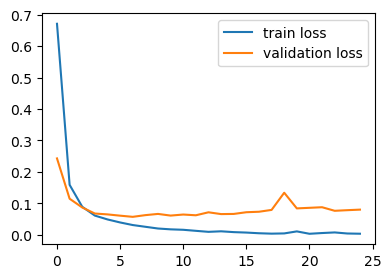

In [8]:
utils.ML.print_overall_metrics(model, dataloaders, loss_fn, device=device)

# Plot train and validation losses:
plt.figure()
plt.plot(train_loss_log)
plt.plot(val_loss_log)
plt.legend(["train loss", "validation loss"])

In [13]:
X, y = next(iter(test_dataloader))

X_conv = F.relu(model.conv1(X.to(device)))

print(X_conv.shape)

num_kernels = X_conv.shape[1]

torch.Size([512, 8, 28, 28])


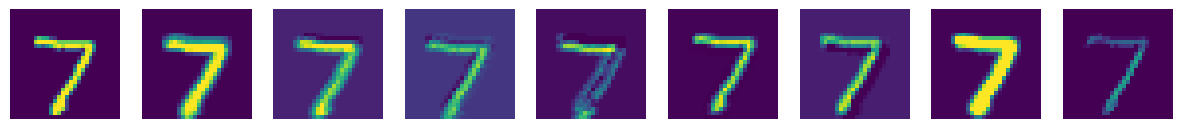

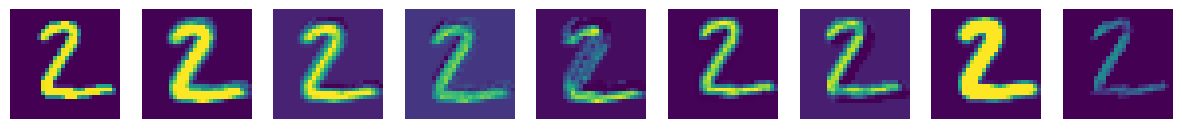

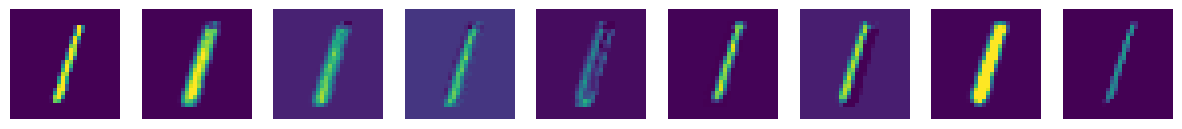

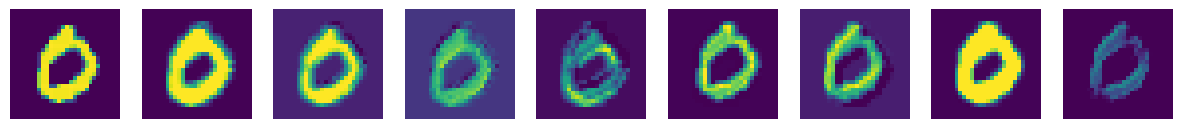

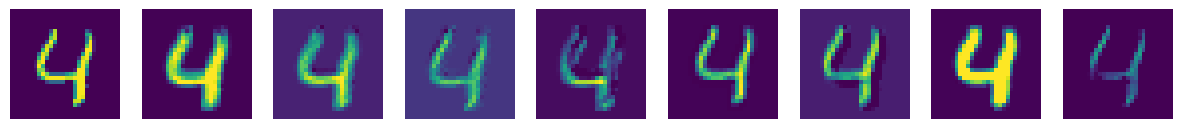

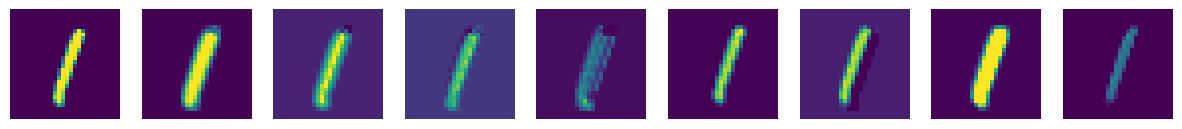

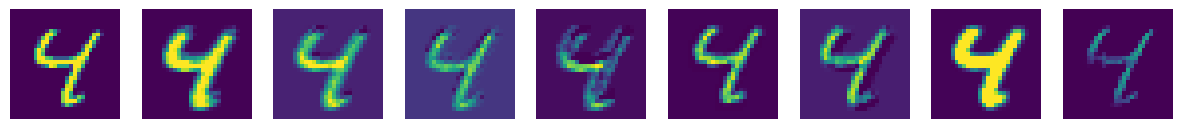

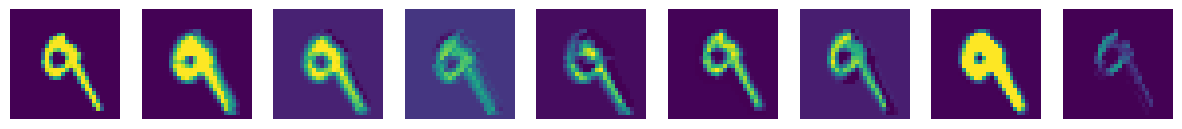

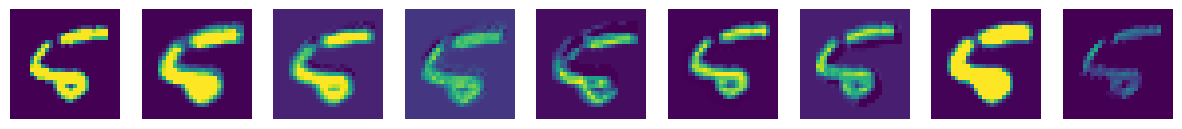

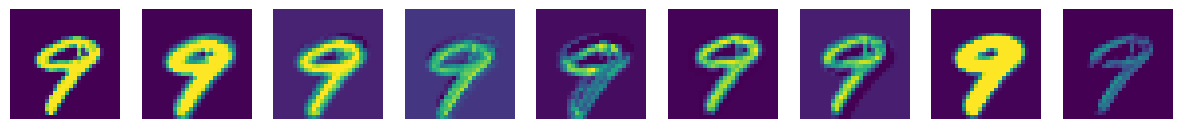

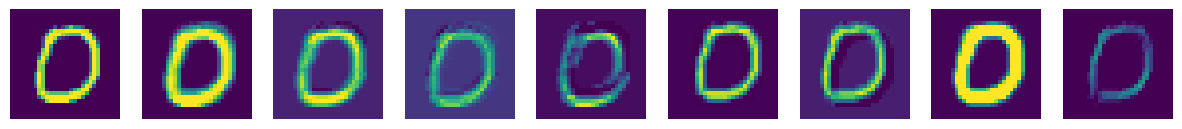

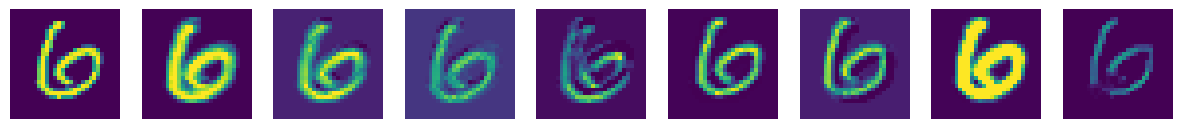

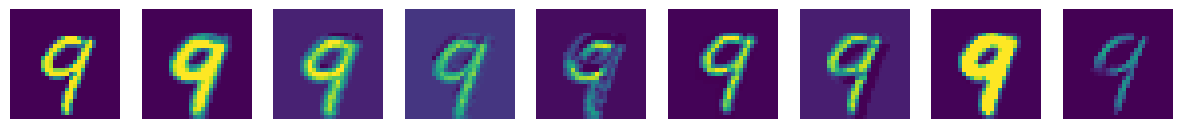

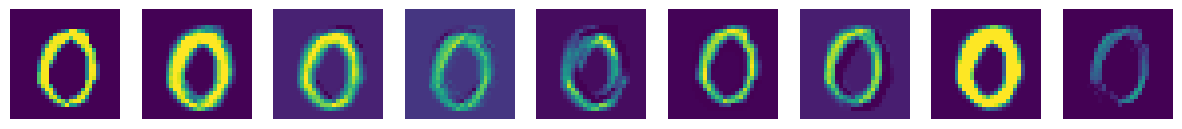

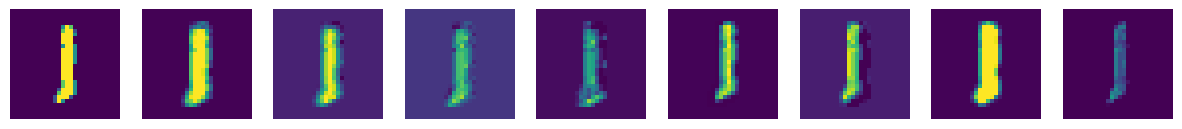

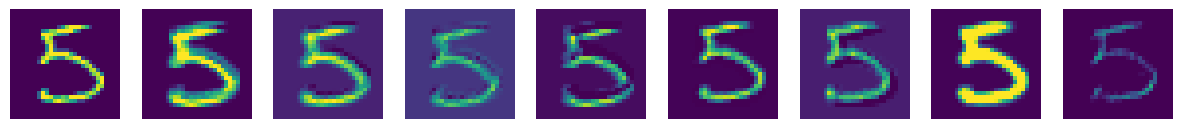

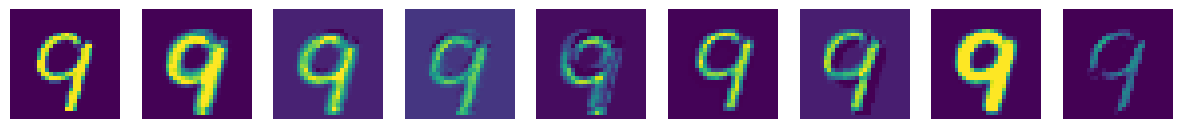

In [18]:
X_conv = X_conv.to('cpu')

for i in range(batch_size):
    fig, ax = plt.subplots(1, num_kernels+1, squeeze=True, figsize=(15, 15))
    ax[0].imshow(X[i, 0], vmin=0, vmax=1)
    ax[0].axis('off')
    
    for j in range(num_kernels):
        ax[j+1].imshow(X_conv[i, j].detach().numpy(), vmin=0, vmax=1)
        ax[j+1].axis('off')
    
    if i > 15:
        break
    

device(type='cpu')

# LeNet

In [19]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=1, padding=2)   # 6x28x28
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0)                            # 6x14x14
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=1, padding=0)  # 16x10x10
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0)                            # 16x5x5
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(16*5*5, 120)
        self.dense2 = nn.Linear(120, 84)
        self.dense3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [21]:
model = LeNet5().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

num_epochs = 25

train_loss_log, val_loss_log = utils.ML.train_model(
    model,
    train_dataloader,
    val_dataloader,
    optimizer,
    loss_fn,
    num_epochs,
    device=device)

 epoch:  1, training loss: 0.722, validation loss 0.241, validation accuracy 0.930
 epoch:  2, training loss: 0.172, validation loss 0.136, validation accuracy 0.959
 epoch:  3, training loss: 0.115, validation loss 0.107, validation accuracy 0.968
 epoch:  4, training loss: 0.093, validation loss 0.085, validation accuracy 0.976
 epoch:  5, training loss: 0.076, validation loss 0.081, validation accuracy 0.977
 epoch:  6, training loss: 0.067, validation loss 0.073, validation accuracy 0.980
 epoch:  7, training loss: 0.059, validation loss 0.078, validation accuracy 0.978
 epoch:  8, training loss: 0.054, validation loss 0.063, validation accuracy 0.982
 epoch:  9, training loss: 0.048, validation loss 0.066, validation accuracy 0.980
 epoch: 10, training loss: 0.045, validation loss 0.059, validation accuracy 0.983
 epoch: 11, training loss: 0.041, validation loss 0.059, validation accuracy 0.983
 epoch: 12, training loss: 0.038, validation loss 0.052, validation accuracy 0.984
 epo

train loss:      0.01382, accuracy: 0.99568
validation loss: 0.05348, accuracy: 0.98640
test loss:       0.03814, accuracy: 0.98940


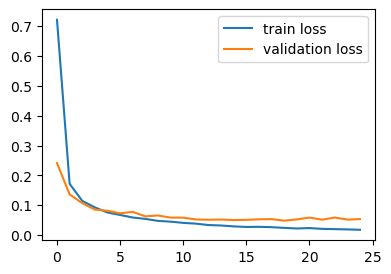

In [22]:
utils.ML.print_overall_metrics(model, dataloaders, loss_fn, device=device)

# Plot train and validation losses:
plt.figure()
plt.plot(train_loss_log)
plt.plot(val_loss_log)
plt.legend(["train loss", "validation loss"])

## Plot hidden layers

/var/folders/hf/dfk5rry94rb_7_459wk4q6br0000gn/T/ipykernel_5002/108230115.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, num_filters, sharey=True, figsize=(15, 15))


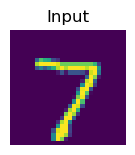

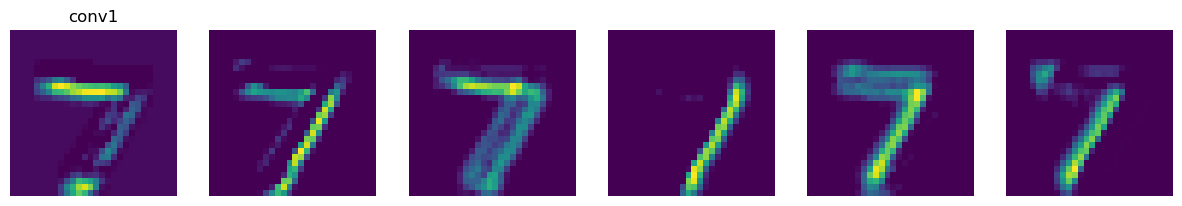

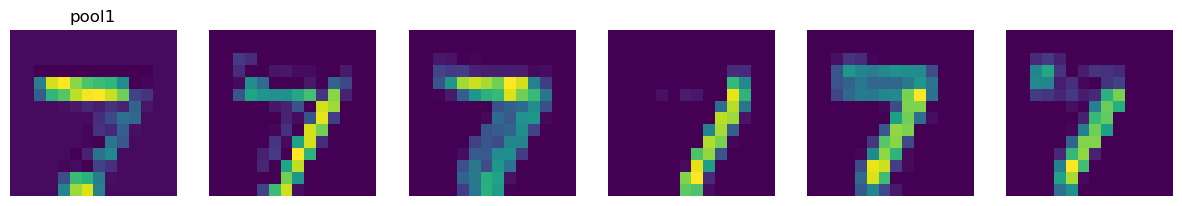

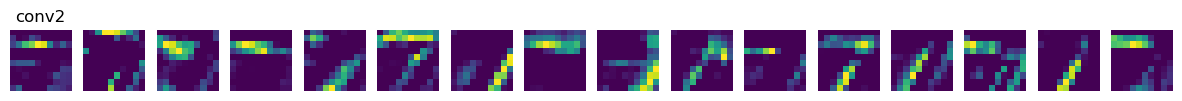

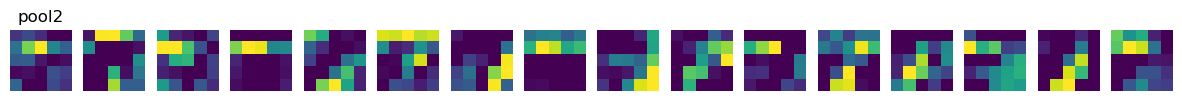

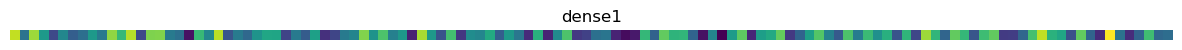

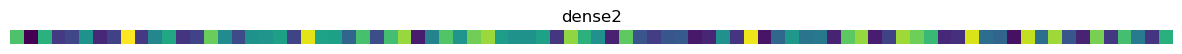

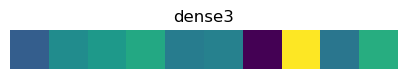

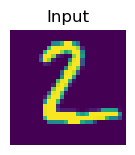

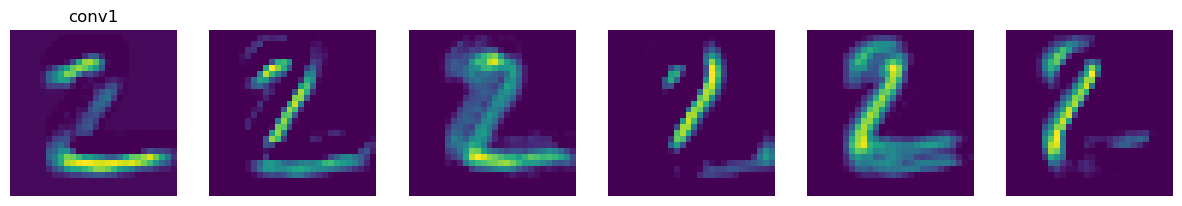

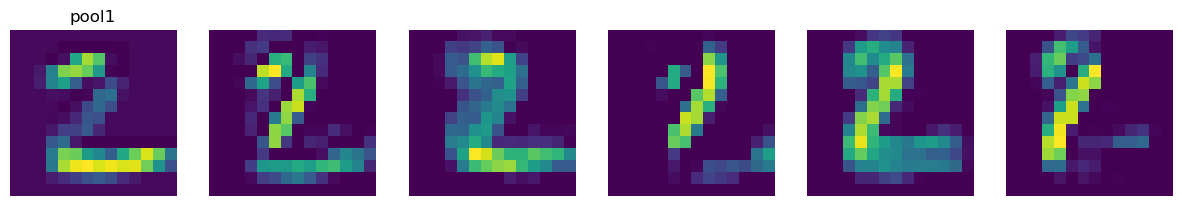

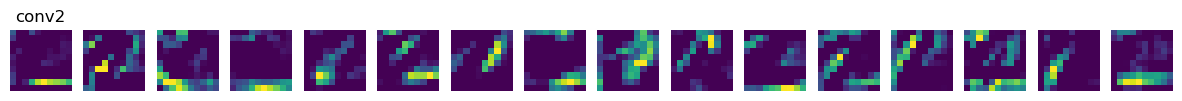

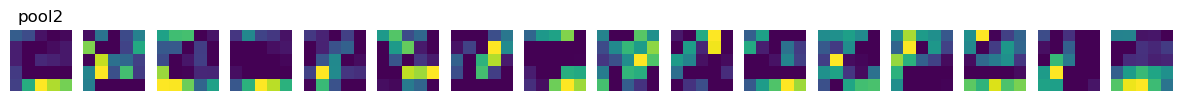

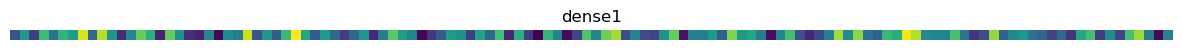

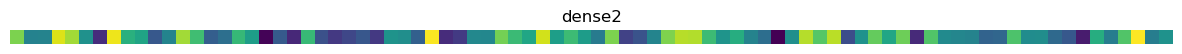

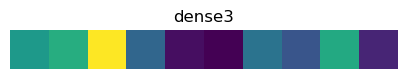

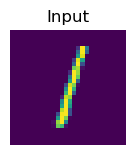

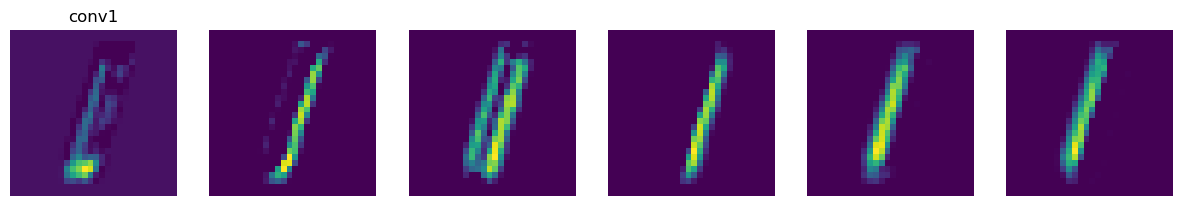

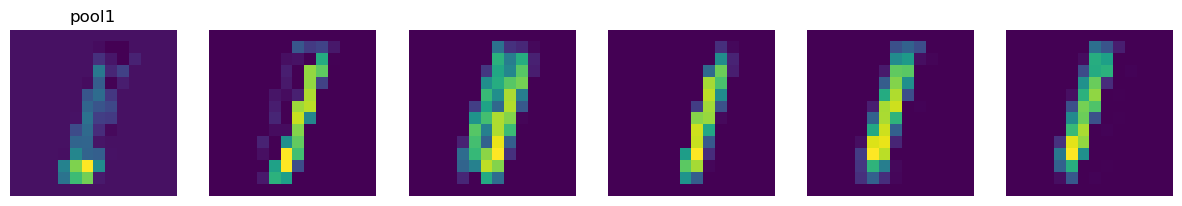

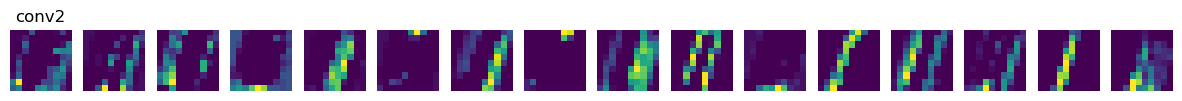

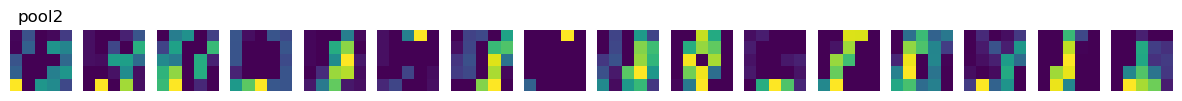

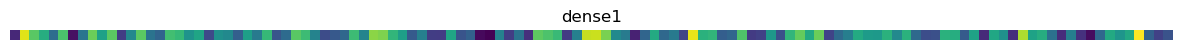

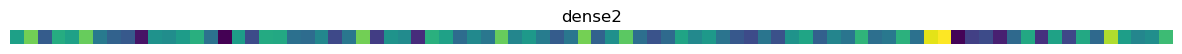

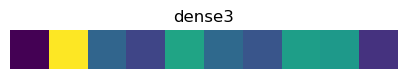

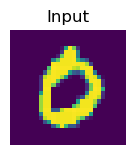

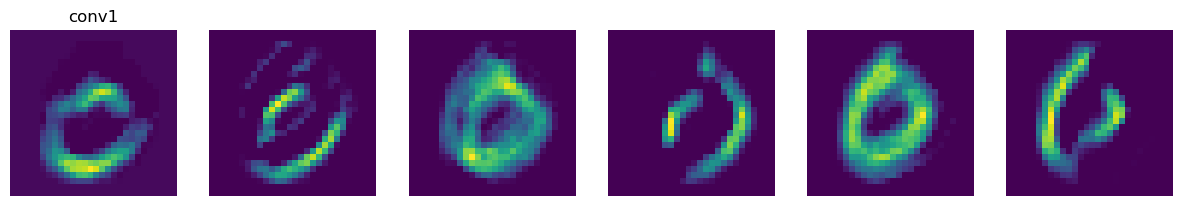

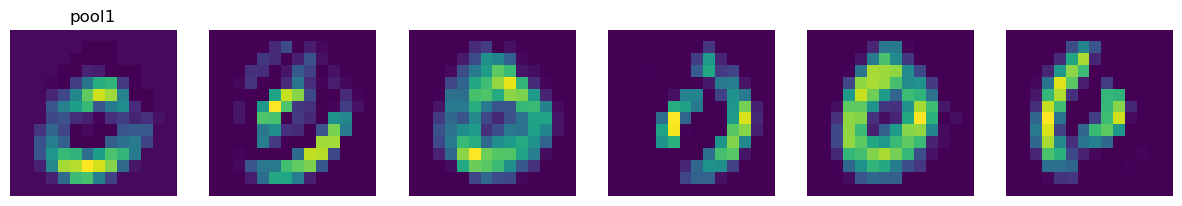

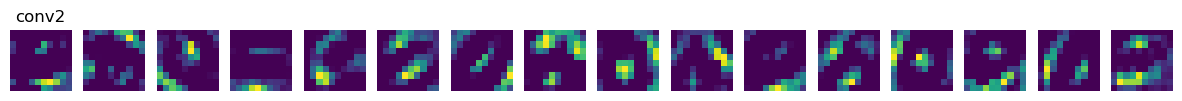

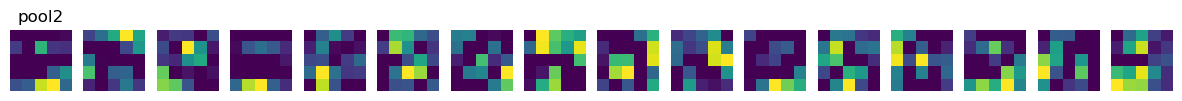

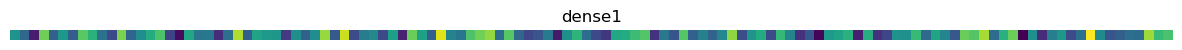

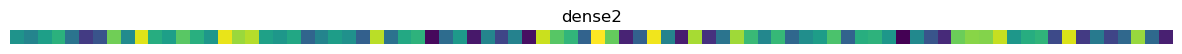

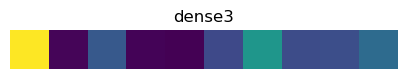

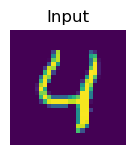

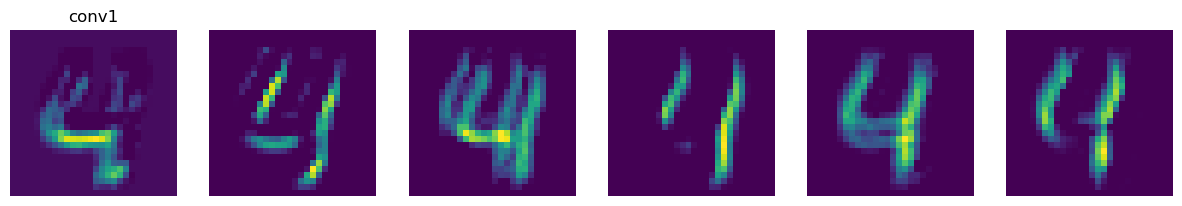

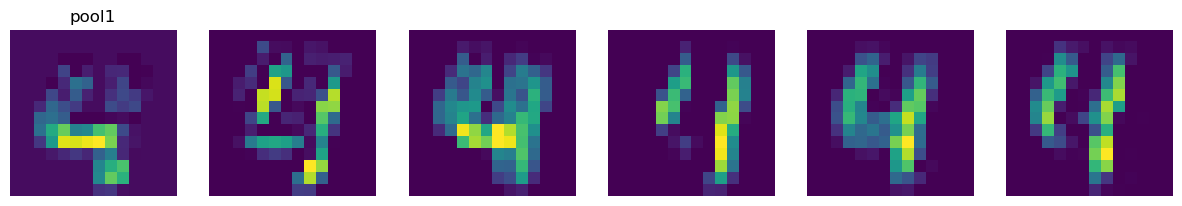

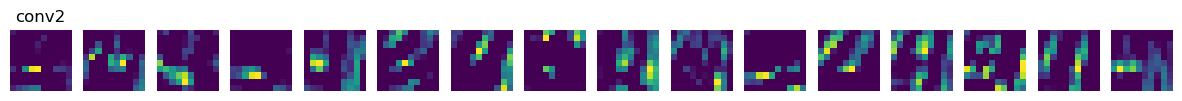

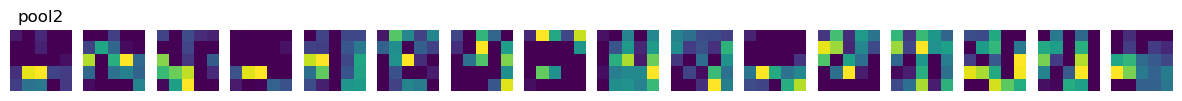

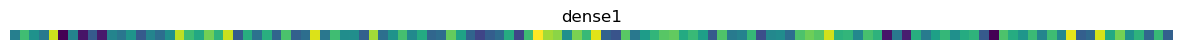

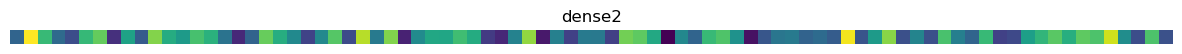

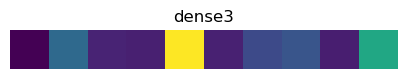

In [67]:
# Plot layers:

X, y = next(iter(test_dataloader))
X = X.to(device)

x_conv1 = F.relu(model.conv1(X))
x_pool1 = model.maxpool1(x_conv1)
x_conv2 = F.relu(model.conv2(x_pool1))
x_pool2 = model.maxpool2(x_conv2)
x_dense1 = model.dense1(model.flatten(x_pool2))
x_dense2 = model.dense2(x_dense1)
x_dense3 = model.dense3(x_dense2)

for i in range(5):
    # input:
    fig, ax = plt.subplots(figsize=[2, 1.5])
    ax.axis('off')
    ax.imshow(X[i].cpu().squeeze())
    ax.set_title('Input')
    
    # conv1:
    num_filters = x_conv1.shape[1]
    fig, ax = plt.subplots(1, num_filters, sharey=True, figsize=(15, 15))
    for j in range(num_filters):
        ax[j].imshow(x_conv1[i, j].cpu().detach())
        ax[j].axis('off')
    ax[0].set_title('conv1')
        
    # pool1:
    num_filters = x_pool1.shape[1]
    fig, ax = plt.subplots(1, num_filters, sharey=True, figsize=(15, 15))
    for j in range(num_filters):
        ax[j].imshow(x_pool1[i, j].cpu().detach())
        ax[j].axis('off')
    ax[0].set_title('pool1')
    
    # conv2:
    num_filters = x_conv2.shape[1]
    fig, ax = plt.subplots(1, num_filters, sharey=True, figsize=(15, 15))
    for j in range(num_filters):
        ax[j].imshow(x_conv2[i, j].cpu().detach())
        ax[j].axis('off')
    ax[0].set_title('conv2')
        
    # pool2:
    num_filters = x_pool2.shape[1]
    fig, ax = plt.subplots(1, num_filters, sharey=True, figsize=(15, 15))
    for j in range(num_filters):
        ax[j].imshow(x_pool2[i, j].cpu().detach())
        ax[j].axis('off')
    ax[0].set_title('pool2')
    
    # dense1:
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.imshow(x_dense1[i:i+1].cpu().detach())
    ax.set_title('dense1')
    ax.axis('off')
    
    # dense2:
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.imshow(x_dense2[i:i+1].cpu().detach())
    ax.set_title('dense2')
    ax.axis('off')
    
    # dense3:
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.imshow(x_dense3[i:i+1].cpu().detach())
    ax.set_title('dense3 (output)')
    ax.axis('off')
    
    


## Plot learned filters:

In [78]:
kernel1 = model.conv1.weight.cpu().detach()
kernel2 = model.conv2.weight.cpu().detach()

print(kernel1.shape)
print(kernel2.shape)

torch.Size([6, 1, 5, 5])
torch.Size([16, 6, 5, 5])


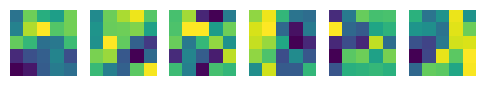

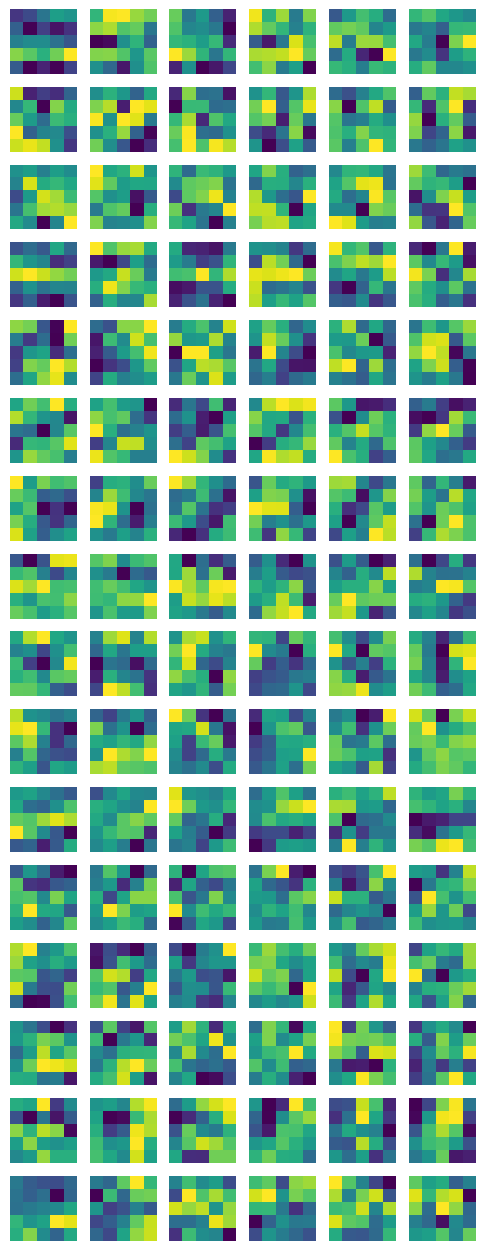

In [99]:
fig, ax = plt.subplots(1, 6, figsize=(6,1))
for i in range(6):
    ax[i].imshow(kernel1[i, 0])
    ax[i].axis('off')
    

fig, ax = plt.subplots(16, 6, figsize=(6,16))
# fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i in range(16):
    for j in range(6):
        ax[i, j].imshow(kernel2[i, j], aspect='auto')
        ax[i, j].axis('off')
        
# fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
    

##  Network vizualization: activation maximization

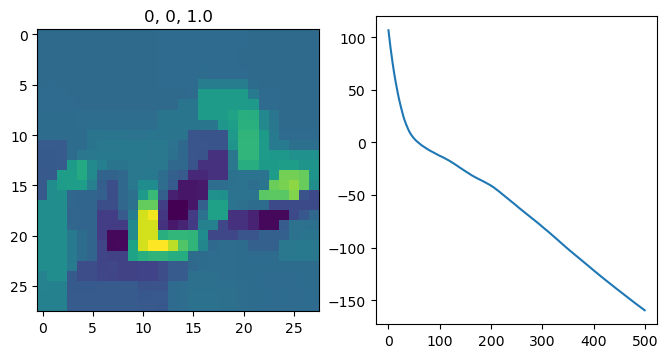

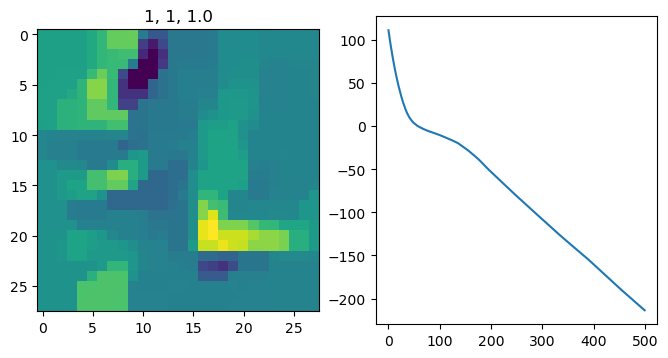

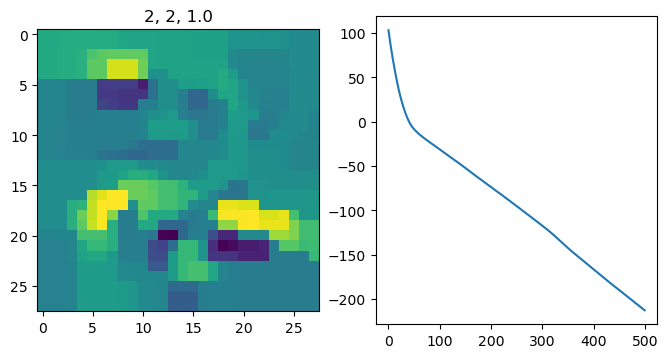

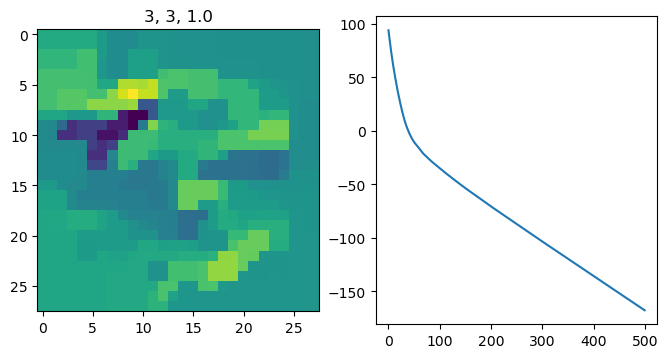

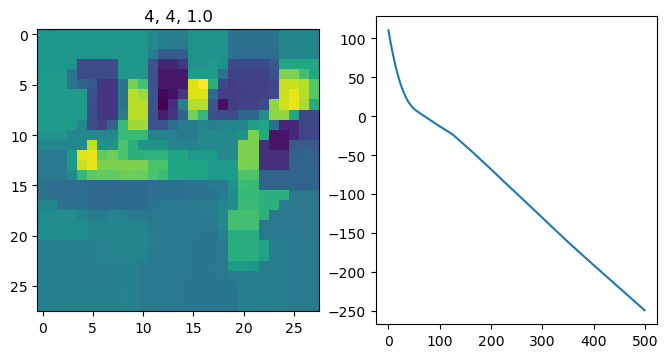

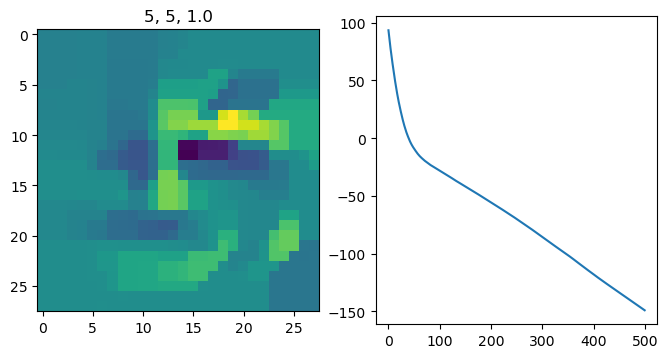

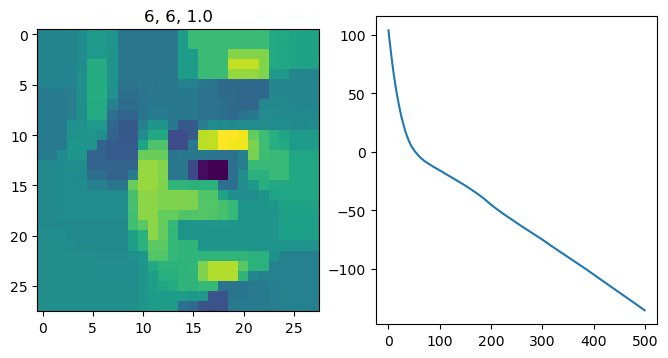

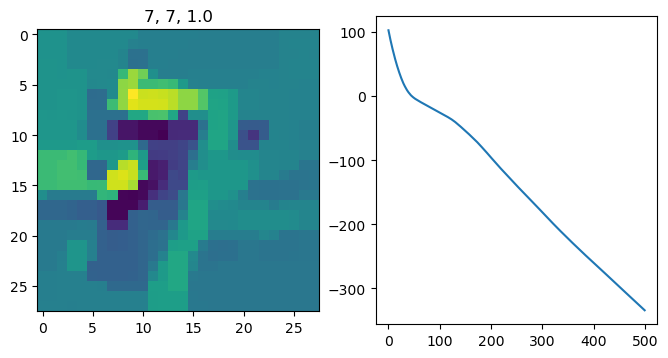

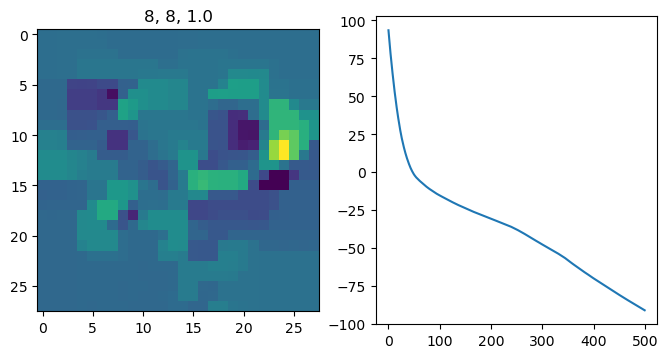

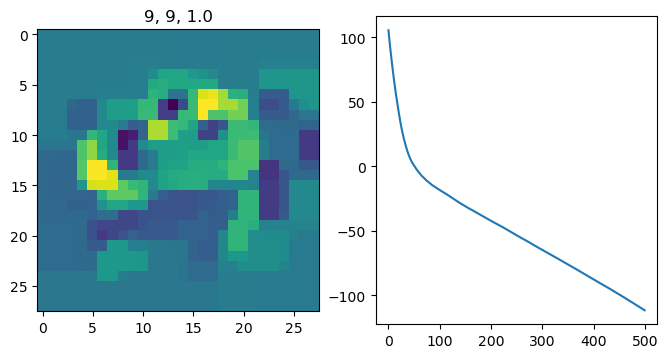

In [241]:
# l1 regularization:
loss_l1 = lambda w: torch.linalg.vector_norm(w, 1)
lambda_l1 = 0

# Total-Variation regularization:
loss_TV = lambda im: torch.sum(torch.abs(im[:, :, 1:, :]-im[:, :, :-1, :])) + torch.sum(torch.abs(im[:, :, :, 1:]-im[:, :, :, :-1]))
lambda_TV = 0.2


for idx in range(10):

    ########### train:
    x_optim = torch.rand((1, 1, 28, 28), requires_grad=True, device='cpu')

    optimizer_im = torch.optim.Adam([x_optim], lr=1e-2)

    loss_log = []

    for it in range(500):

        out = model(x_optim)

        loss = - out[...,idx] + lambda_l1 * loss_l1(x_optim) + lambda_TV * loss_TV(x_optim)

        optimizer_im.zero_grad()

        loss.backward()
        optimizer_im.step()

        loss_log.append(loss.item())
        
        
    softmax = F.softmax(out, -1)
    pred_idx = torch.argmax(out).item()
    conf = softmax[..., pred_idx].item()
            
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(x_optim.squeeze().detach())
    ax[0].set_title(f'{idx}, {pred_idx}, {conf:.3}')

    ax[1].plot(loss_log)
            